In [1]:
import pandas as pd
import numpy as n
import pickle
import os
import sys
from pathlib import Path


root = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
while root.parent != root:
    if ((root / ".git").exists() and 
        (root / "README.txt").exists() and 
        (root / "results.ipynb").exists()): break
    root = root.parent
if str(root) not in sys.path: sys.path.insert(0, str(root))
from src.utils.paths import STORED_DATAPREP_PKL_PATH

data_path = root / STORED_DATAPREP_PKL_PATH
with open(os.path.normpath(data_path), "rb") as f:
    data = pickle.load(f)

dataA = data['dataA']
dataC = data['dataC']
dataA_startID = data['dataA_startID']
dataA_endID = data['dataA_endID']
dataC_lastGoodID = data['dataC_lastGoodID']



# How to use, load and save plots 

In the new folder _gui there are (for now) 3 files: gui.py, plots_gui.py and plots_gui.pkl

1. gui.py - here is all the layout for a fancy GUI interface for fast and comfortable plot visualisatiopn 
2. plot_gui.py - here is a class that allows to easy "build" plots from an existing template. Its also necessary to have this class so all plots are manipulated in the same way(displayed, load and saved). Can be improved in any moment to better track plots(eg: make an attribute "categories")
3. plots_gui.pkl - containt all loaded plots. The save function of PlotsGUI has a anti-duplicate test, but it tests only titles. This allows us to make sure that plots are unique, but also allows us to easely download a plot list, update it and save it back.


In [2]:
from plots_gui import PlotGUI, ScatterPlotGUI

## Creating a plot

Since each plot is made of a main class PlotGUI. The second is neccessary and mandatory to define since the type of plot may vary(eg: Scattered or Hystogram). 

Here is an example of a type definition: 

```python

class HistPlotGUI(PlotGUI):
    def define_plot(self, ax: plt.Axes) -> plt.Axes:
        ax.hist(data['dataA'][0]["mean"], bins=30, color='skyblue', edgecolor='black')
        return ax
````



In [3]:

x_data = [len(df) for df in dataA]                        # X – number of captions per contest
y_data = [df["votes"].sum() for df in dataA]              # Y – total votes per contest


# ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Representative examples of ScatterPlotGUI instantiation
# ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

import numpy as np

plots = []

# 1. Simple linear relation
plot1 = ScatterPlotGUI(
        title="Simple Linear",
        description="Basic X–Y linear relation example.",
        xlabel="X values",
        ylabel="Y values",
        dataX=[1, 2, 3, 4, 5],
        dataY=[2, 4, 6, 8, 10],
    )

plots.append(plot1)

# 2. Random scatter
plots.append(
    ScatterPlotGUI(
        title="Random Distribution",
        description="Random points with transparency.",
        dataX=np.random.randn(100),
        dataY=np.random.randn(100),
        c="tomato",
        alpha=0.5,
        s=40,
    )
)

# 3. Parabolic curve
x = np.linspace(-3, 3, 60)
y = x**2
plots.append(
    ScatterPlotGUI(
        title="Parabola Shape",
        description="Y = X² curve with filled circles.",
        xlabel="X",
        ylabel="Y = X²",
        dataX=x,
        dataY=y,
        c="royalblue",
        s=70,
        marker="o",
        edgecolors="black",
    )
)

# 4. Color-mapped sine wave
x = np.linspace(0, 10, 100)
y = np.sin(x)
plots.append(
    ScatterPlotGUI(
        title="Color-mapped Sine Wave",
        description="Sine wave with color gradient by Y value.",
        dataX=x,
        dataY=y,
        c=y,
        cmap="viridis",
        s=80,
        alpha=0.8,
        marker="^",
    )
)

# 5. Two groups for comparison
plots.append(
    ScatterPlotGUI(
        title="Group A",
        description="First data cluster.",
        dataX=[1, 2, 3, 4],
        dataY=[1, 1.5, 1.8, 2.2],
        c="green",
        marker="o",
    )
)

plots.append(
    ScatterPlotGUI(
        title="Group B",
        description="Second data cluster overlaid.",
        dataX=[2, 3, 4, 5],
        dataY=[3, 2.7, 2.5, 2.2],
        c="orange",
        marker="x",
    )
)


PlotGUI.add_plots(plots)



💾 Saved 9 total plots to /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/data/plots_gui.pkl
✅ Added 6 new plots.


## Display a plot 

/Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/src/utils/gui/plots_gui.py:107: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/src/utils/gui/plots_gui.py:307: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(self.dataX, self.dataY, **self.plotParams)


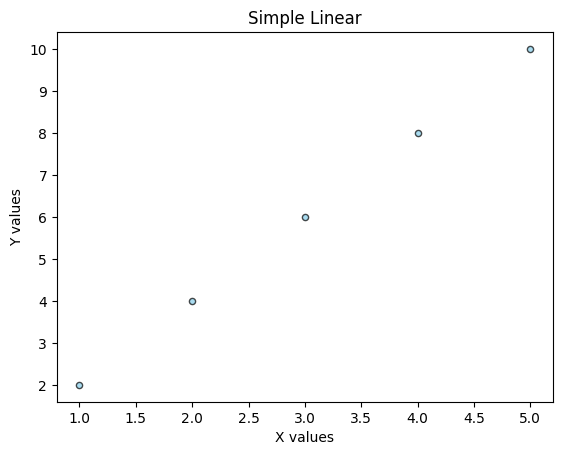

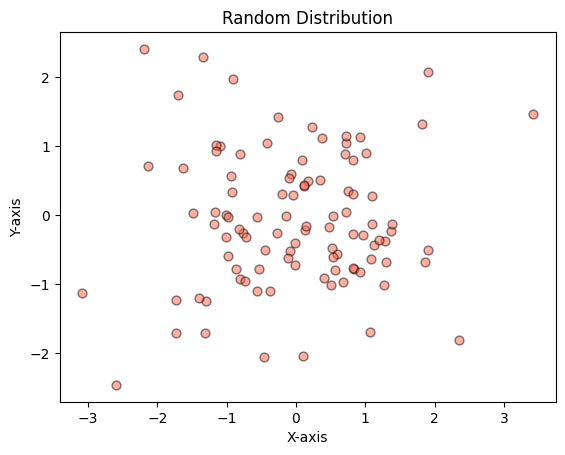

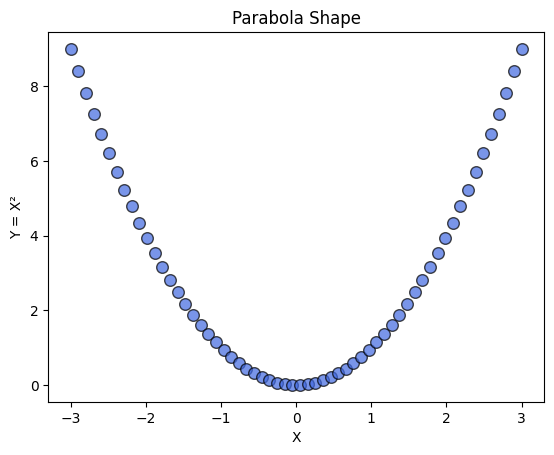

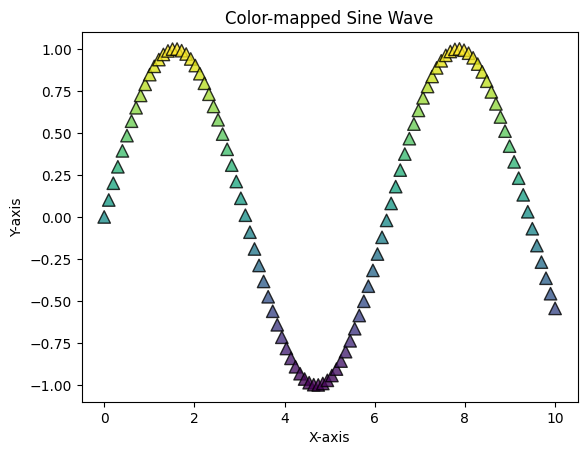

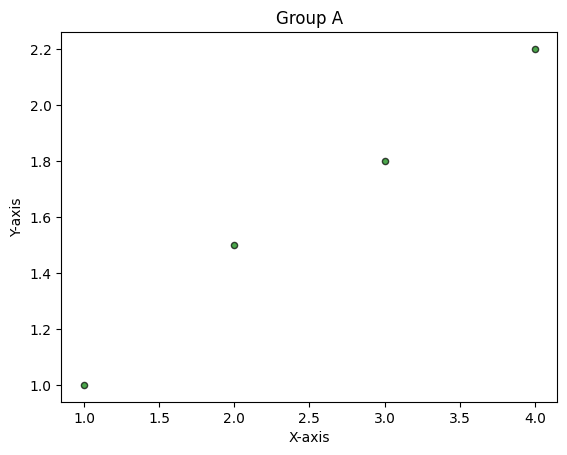

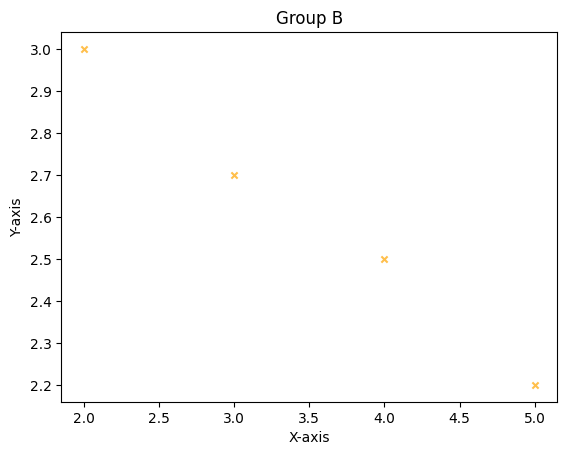

In [4]:
for plot in plots:
    plot.show()

## Store plots

In [5]:
PlotGUI.add_plots(plots)


💾 Saved 9 total plots to /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/data/plots_gui.pkl
ℹ️ No new plots were added (all already present).


No redundant plot added

In [6]:
import copy
plot1_copy = copy.copy(plot1)
plots.append(plot1_copy)

PlotGUI.add_plots(plots)

💾 Saved 9 total plots to /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/data/plots_gui.pkl
ℹ️ No new plots were added (all already present).


### Load plots

In [7]:
plots = PlotGUI.load_plots()

✅ Loaded 9 plots from /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/data/plots_gui.pkl


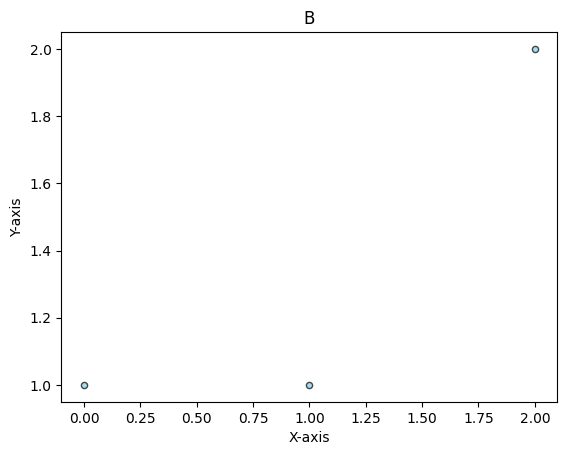

In [8]:
plots[1].show()
plots

In [9]:
# =====================================================
# Example 1 — Replace all existing plots
# =====================================================
p1 = ScatterPlotGUI(title="A", dataX=[1, 2, 3], dataY=[2, 4, 6])
p2 = ScatterPlotGUI(title="B", dataX=[0, 1, 2], dataY=[1, 1, 2])
p3 = ScatterPlotGUI(title="C", dataX=[5, 6, 7], dataY=[7, 8, 9])

PlotGUI.replace_plots([p1, p2, p3])
# 💾 Replaced all plots in ...plots_gui.pkl
# ✅ Saved 3 new plots.


# =====================================================
# Example 2 — Delete a plot by title
# =====================================================
PlotGUI.delete_plot_by_title("B")
# 🗑️ Deleted plot 'B'
# 💾 Remaining plots: 2


# =====================================================
# Example 3 — Replace a single plot by title
# =====================================================
new_p1 = ScatterPlotGUI(title="A", dataX=[10, 20, 30], dataY=[5, 15, 25], c="tomato")
PlotGUI.replace_plot(new_p1)
# 🔁 Replaced existing plot titled 'A'.
# 💾 Saved 2 total plots to ...plots_gui.pkl

💾 Replaced all plots in /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/data/plots_gui.pkl
✅ Saved 3 new plots.
🗑️ Deleted plot 'B' from /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/data/plots_gui.pkl
💾 Remaining plots: 2
🔁 Replaced existing plot titled 'A'.
💾 Saved 2 total plots to /Users/43rt1k/Documents/EPFL/_MASTER/ADA/ADAcore42/data/plots_gui.pkl
